In [5]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib import lines
from matplotlib import colors as mcolors



In [10]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Results"
files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_for_configuration")]


all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df)

combined_df = pd.concat(all_dataframes)


In [11]:
combined_df

,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,0,1,4,2,9549.459741,2000.0,2000.0,0.05,0,0.0
1,0,2,4,2,9549.459847,2000.0,2000.0,0.05,0,0.0
2,0,3,4,2,9549.460150,2000.0,2000.0,0.05,0,0.0
3,0,0,4,2,9549.551487,2000.0,2000.0,0.05,0,0.0
0,0,0,1,4,20725.408754,2000.0,2000.0,0.05,0,0.0
...,...,...,...,...,...,...,...,...,...,...
1,0,2,6,2,6709.132059,2000.0,2000.0,0.05,0,0.0
2,0,3,6,2,6709.132330,2000.0,2000.0,0.05,0,0.0
3,0,4,6,2,6709.132763,2000.0,2000.0,0.05,0,0.0
4,0,5,6,2,6709.133127,2000.0,2000.0,0.05,0,0.0


In [12]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).mean().reset_index()
groupby_df

,Number of processes,Number of threads,Scheme,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1,1,0.0,0.0,69544.404306,2000.0,2000.0,0.05,0.0,0.0
1,1,2,0.0,0.0,37328.404306,2000.0,2000.0,0.05,0.0,0.0
2,1,4,0.0,0.0,20725.408754,2000.0,2000.0,0.05,0.0,0.0
3,1,8,0.0,0.0,13376.265588,2000.0,2000.0,0.05,0.0,0.0
4,2,1,0.0,0.5,36286.770455,2000.0,2000.0,0.05,0.0,0.0
5,2,2,0.0,0.5,18897.963410,2000.0,2000.0,0.05,0.0,0.0
6,2,4,0.0,0.5,10648.162887,2000.0,2000.0,0.05,0.0,0.0
7,2,8,0.0,0.5,8566.857614,2000.0,2000.0,0.05,0.0,0.0
8,4,1,0.0,1.5,18363.979548,2000.0,2000.0,0.05,0.0,0.0
9,4,2,0.0,1.5,9549.482806,2000.0,2000.0,0.05,0.0,0.0


In [13]:
groupby_df['Number of processes']

0     1
1     1
2     1
3     1
4     2
5     2
6     2
7     2
8     4
9     4
10    4
11    4
12    6
13    6
14    6
15    6
16    8
17    8
18    8
19    8
Name: Number of processes, dtype: int64

[35243.6207385, 18599.938591125, 9268.347718374998, 6398.746303083333, 4713.9084969375]
[1, 2, 4, 6, 8]
[35243.6207385, 17621.81036925, 8810.905184625, 5873.936789750001, 4405.4525923125]
[1.0, 1.894824575136854, 3.8025786050978243, 5.507894682668905, 7.476517790151599]
[1, 2, 4, 6, 8]


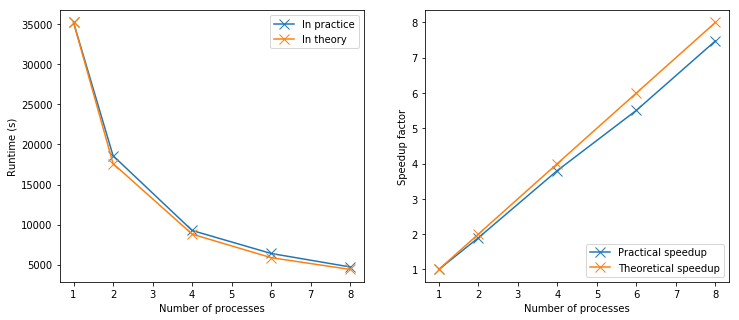

In [14]:
# Plot average time as a function of process number number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
for index,i in enumerate(groupby_df['Number of processes'].unique()):
    meanTimePerNbThreads.append(groupby_df[groupby_df['Number of processes'] == i]['Time per process'].mean())

meanTimePerNbThreads

    
# # plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(groupby_df['Number of processes'].unique(), meanTimePerNbThreads))]
print(meanTime)
# print(meanTime)
nbProcess = sorted(groupby_df['Number of processes'].unique())
print(nbProcess)
ax1.plot(nbProcess, meanTime, marker='x',markersize=10)

for i in nbProcess:
    theoreticalMeanTime.append(meanTime[0]/i)

print(theoreticalMeanTime)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, nbProcess, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of processes")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='lower right')

fig.savefig("Runtime_Speedup_processes.svg")

[29102.461017750007, 15346.12912905, 8630.198546441667, 6300.860785175]
[1, 2, 4, 8]
[29102.461017750007, 14551.230508875004, 7275.615254437502, 3637.807627218751]
[1.0, 1.8964040229962271, 3.3721658732578406, 4.618807177302476]
[1, 2, 4, 8]


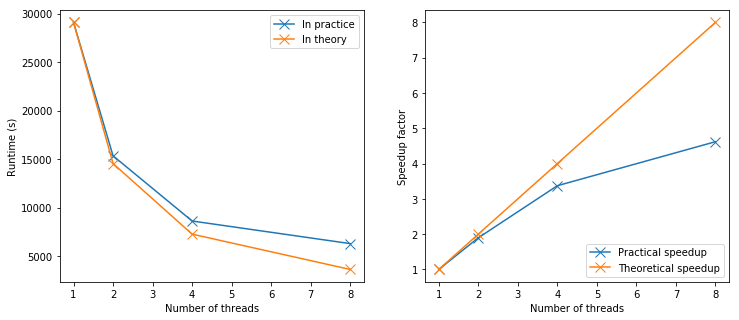

In [15]:
# Plot average time as a function of thread number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
for index,i in enumerate(groupby_df['Number of threads'].unique()):
    meanTimePerNbThreads.append(groupby_df[groupby_df['Number of threads'] == i]['Time per process'].mean())

meanTimePerNbThreads

    
# # plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(groupby_df['Number of threads'].unique(), meanTimePerNbThreads))]
print(meanTime)
# print(meanTime)
nbThreads = sorted(groupby_df['Number of threads'].unique())
print(nbThreads)
ax1.plot(nbThreads, meanTime, marker='x',markersize=10)

for i in nbThreads:
    theoreticalMeanTime.append(meanTime[0]/i)
print(theoreticalMeanTime)
ax1.plot(nbThreads, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Runtime (s)",xlabel="Number of threads")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of thread number
speedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbThreads)
ax2.plot(nbThreads, speedUp, marker='x',markersize=10)
ax2.plot(nbThreads, nbThreads, marker='x',markersize=10)
ax2.set(ylabel="Speedup factor", xlabel="Number of threads")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='lower right')

fig.savefig("Runtime_Speedup_threads.svg")

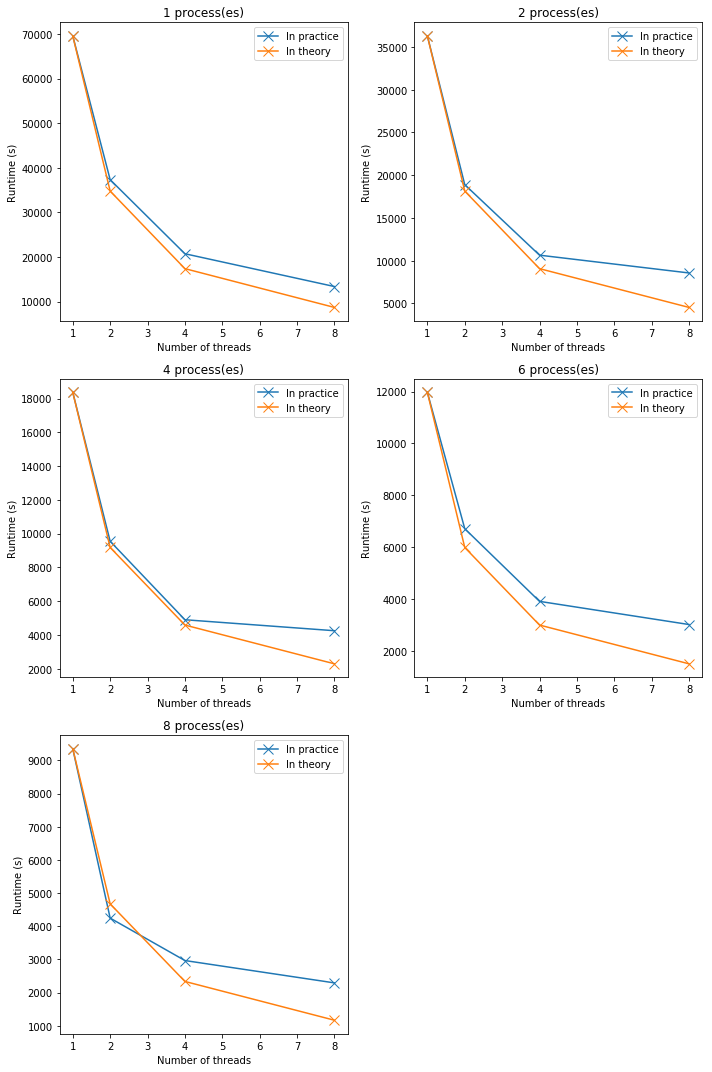

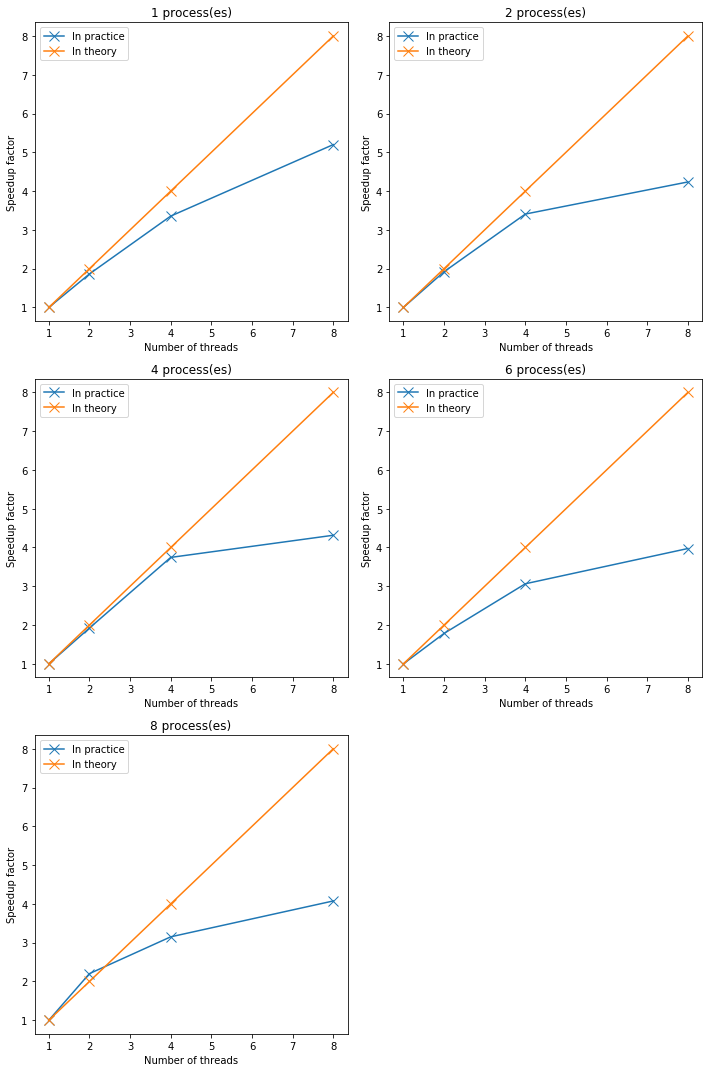

In [16]:
# Plot average time as a function of thread number
fig, ax = plt.subplots(3,2, figsize=(10,15))
fig_speedup, ax_speedup = plt.subplots(3,2, figsize=(10,15))

axs = fig.axes
axs_speedup = fig_speedup.axes
colors_list = list(mcolors._colors_full_map.values())
linestyle = list(lines.lineStyles.keys())

colors = ['red','green','blue', 'orange', 'black', 'purple']
legend = []
for idx_p, p in enumerate(groupby_df['Number of processes'].unique()):
    
    partial_df = groupby_df[groupby_df['Number of processes']  == p]
    nbThreads = partial_df['Number of threads'].unique()
    
    TimePerNbProcessPerThread = []
    theoreticalMeanTime = []
    


    for index,thread in enumerate(sorted(nbThreads)):
        time = partial_df[partial_df['Number of threads'] == thread]['Time per process'].values
        TimePerNbProcessPerThread.append(time)
    
    for i in sorted(nbThreads):
        theoreticalMeanTime.append(TimePerNbProcessPerThread[0]/i)


    speedUp = []
    for i in range(0,len(TimePerNbProcessPerThread)):
        speedUp.append(TimePerNbProcessPerThread[0]/TimePerNbProcessPerThread[i])
    
    # Plot runtime
    
    axs[idx_p].plot(nbThreads, TimePerNbProcessPerThread, marker='x',
             markersize=10)  #, color=colors[idx_p], linestyle=linestyle[idx_p])

    axs[idx_p].plot(nbThreads, theoreticalMeanTime, marker='x',
             markersize=10)  #  , color=colors[idx_p], linestyle=linestyle[idx_p])
    
    axs[idx_p].set(ylabel="Runtime (s)",xlabel="Number of threads", title = "{} process(es)".format(p))
    axs[idx_p].legend(["In practice","In theory"], loc  ='best')
    
    # Plot speedup
    
    axs_speedup[idx_p].plot(nbThreads, speedUp, marker='x',
             markersize=10)  #, color=colors[idx_p], linestyle=linestyle[idx_p])

    axs_speedup[idx_p].plot(nbThreads, nbThreads, marker='x',
             markersize=10)  #  , color=colors[idx_p], linestyle=linestyle[idx_p])
    
    
    axs_speedup[idx_p].set(ylabel="Speedup factor",xlabel="Number of threads", title = "{} process(es)".format(p))
    axs_speedup[idx_p].legend(["In practice","In theory"], loc  ='best')
    
fig.delaxes(ax[2,1])
fig_speedup.delaxes(ax_speedup[2,1])
    
fig.tight_layout() 
fig_speedup.tight_layout() 


fig.savefig("Runtime_processes_threads_detail.svg")
fig_speedup.savefig("Speedup_processes_threads_detail.svg")





In [17]:
directory = "/home/tom/Documents/Uliege/Master2/HPC/Project2/Results"
files = [filename for filename in os.listdir(directory) if filename.startswith("statistics_for_weakscaling")]


all_dataframes = []
for f in files:

    part_df = pd.read_csv(os.path.join(directory,f), header=0)

    if not part_df.empty:
        all_dataframes.append(part_df)

combined_df = pd.concat(all_dataframes)
combined_df

,Scheme,Process number,Number of processes,Number of threads,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,4 total processes failed to start,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0,1.0,16.0,4.0,117.002150,250.0,1890.0,0.05,1.0,0.0
1,0,2.0,16.0,4.0,117.002996,250.0,1890.0,0.05,1.0,0.0
2,0,3.0,16.0,4.0,117.003666,250.0,1890.0,0.05,1.0,0.0
3,0,4.0,16.0,4.0,117.004754,250.0,1890.0,0.05,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
11,0,12.0,16.0,4.0,238.792220,250.0,1890.0,0.05,1.0,0.0
12,0,13.0,16.0,4.0,238.793149,250.0,1890.0,0.05,1.0,0.0
13,0,14.0,16.0,4.0,238.794002,250.0,1890.0,0.05,1.0,0.0
14,0,15.0,16.0,4.0,238.794795,250.0,1890.0,0.05,1.0,0.0


In [18]:
groupby_df = combined_df.groupby(['Number of processes','Number of threads']).mean().reset_index()
groupby_df

,Number of processes,Number of threads,Process number,Time per process,DeltaX,DeltaY,DeltaT,s,r_threshold
0,1.0,4.0,0.0,101.880560,4000.0,1890.0,0.05,1.0,0.0
1,2.0,4.0,0.5,103.241052,2000.0,1890.0,0.05,1.0,0.0
2,4.0,4.0,1.5,115.696977,1000.0,1890.0,0.05,1.0,0.0
3,8.0,4.0,3.5,119.774210,500.0,1890.0,0.05,1.0,0.0
4,16.0,4.0,7.5,174.626480,250.0,1890.0,0.05,1.0,0.0


[101.8805595, 103.2410523, 115.69697700000002, 119.77420965625001, 174.626479625]
[1.0, 2.0, 4.0, 8.0, 16.0]
[101.8805595, 101.8805595, 101.8805595, 101.8805595, 101.8805595]
[1.0, 0.9868221722881451, 0.8805809982399107, 0.8506051494090048, 0.5834198783528275]
[1.0, 2.0, 4.0, 8.0, 16.0]


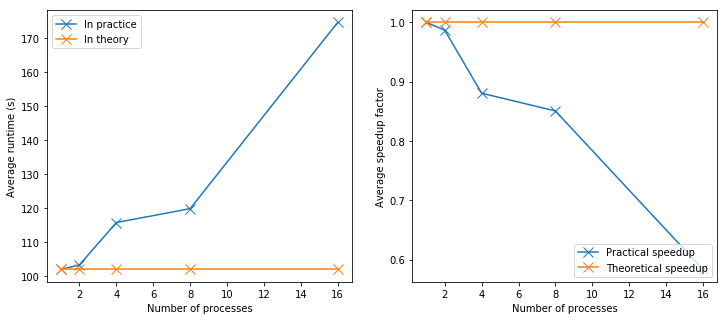

In [19]:
# Plot average time as a function of process number number
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

meanTimePerNbThreads = []
theoreticalMeanTime = []
for index,i in enumerate(groupby_df['Number of processes'].unique()):
    meanTimePerNbThreads.append(groupby_df[groupby_df['Number of processes'] == i]['Time per process'].mean())

meanTimePerNbThreads

    
# # plt.scatter(df.N.unique(), meanTimePerN, marker='x')
meanTime = [x for y, x in sorted(zip(groupby_df['Number of processes'].unique(), meanTimePerNbThreads))]
print(meanTime)
# print(meanTime)
nbProcess = sorted(groupby_df['Number of processes'].unique())
print(nbProcess)
ax1.plot(nbProcess, meanTime, marker='x',markersize=10)

theoreticalMeanTime = [meanTime[0]] * len(nbProcess)

print(theoreticalMeanTime)
ax1.plot(nbProcess, theoreticalMeanTime, marker='x',markersize=10)
ax1.set(ylabel="Average runtime (s)",xlabel="Number of processes")
ax1.legend(["In practice","In theory"],loc='best')

# Plot speedup factor as a function of process number
speedUp = []
theoreticalSpeedUp = []
for i in range(0,len(meanTime)):
    speedUp.append(meanTime[0]/meanTime[i])
    theoreticalSpeedUp.append(meanTime[0]/meanTime[i])
print(speedUp)
print(nbProcess)
ax2.plot(nbProcess, speedUp, marker='x',markersize=10)
ax2.plot(nbProcess, [1]*len(nbProcess), marker='x',markersize=10)
ax2.set(ylabel="Average speedup factor", xlabel="Number of processes")
ax2.legend(["Practical speedup", "Theoretical speedup"], loc  ='lower right')

fig.savefig("Weakscaling_runtime_speedup.svg")